<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/CNN%20From%20Scratch%20with%20Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20DS708– Deep Learning for Visual Recognition. (M.Tech-DS(2020-22))**
**2020-2021(Even) Assignment 1: 2-D Convolutional Neural Networks**


***Theivaprakasham H - CB.EN.P2CEN20026***

**1. Build your own “2-D Convolution” function file to perform the convolution operation, given the input matrix of size m x m and one filter of size f x f, such that the ouput convolution length is given by m-f+1.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Downloading Sample image from GitHub
!wget "https://raw.githubusercontent.com/Theivaprakasham/BIS/master/Red-Pierrot---Theivaprakasham-Hari.jpg"

--2021-04-13 14:02:50--  https://raw.githubusercontent.com/Theivaprakasham/BIS/master/Red-Pierrot---Theivaprakasham-Hari.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53993 (53K) [image/jpeg]
Saving to: ‘Red-Pierrot---Theivaprakasham-Hari.jpg.2’

Red-Pierrot---Theiv 100%[===================>]  52.73K  --.-KB/s    in 0.006s  

2021-04-13 14:02:50 (8.26 MB/s) - ‘Red-Pierrot---Theivaprakasham-Hari.jpg.2’ saved [53993/53993]



In [ ]:
from PIL import Image

In [ ]:
#Opening Image using PIL Library
abc = Image.open("/content/Red-Pierrot---Theivaprakasham-Hari.jpg")

[[43 42 42 ... 29 29 29]
 [43 42 42 ... 29 29 29]
 [42 42 43 ... 29 30 30]
 ...
 [30 30 29 ... 60 61 62]
 [29 28 28 ... 51 53 54]
 [29 29 29 ... 47 47 47]]

The Shape of Image:  (256, 256)


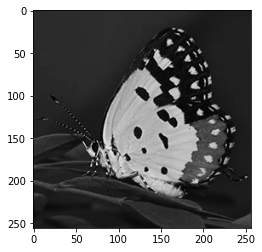

In [ ]:
#Converting image into Array
image = np.array(abc)
print(image)
print("\nThe Shape of Image: ", image.shape)
plt.imshow(image,cmap='gray')

The Shape of Filter:  (10, 10)


Text(0.5, 1.0, '10x10 Convolutional Filter')

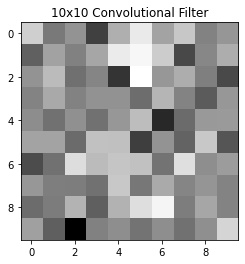

In [ ]:
#Creating 10x10 Convolutional Filter

filter = np.random.randn(10, 10);
print("The Shape of Filter: ", filter.shape)
plt.imshow(filter, cmap='gray')
plt.title("10x10 Convolutional Filter")

In [ ]:
#Defining 2D Convolution function with valid padding

def conv2d(input, kernel):
  H,W = input.shape
  M,N = kernel.shape
  out = np.zeros((H-M+1,W-N+1),  dtype=float)
  kernel = np.flip(kernel)
  for i in range(H-M+1):
    for j in range(W-N+1):
      out[i,j] =  np.sum( input[i:i+M,j:j+N] * kernel)  #Performing Convolution
  return out

The Shape of Output:  (247, 247)


Text(0.5, 1.0, 'Output Image after applying 2D Convolutional Filter')

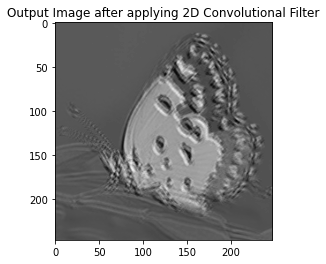

In [ ]:
#Performing Convolution
output = conv2d(image,filter)

print("The Shape of Output: ", output.shape)
plt.imshow(output, cmap='gray')
plt.title("Output Image after applying 2D Convolutional Filter")

**Input image Size (m X m): 256px X 256px**

**Conv Filter Size (n X n) : 10px X 10px**

**Output Image Size with Valid Padding** = m - n + 1 = 256 - 10 + 1 = **247px X 247px**



-----------------------------------


**2. Build your own “2-D Convolution” function file to perform the convolution operation  given the input matrix of size m x m and one filter of size f x f, such that the ouput convolution length is same as that of the length of the input sequence.**

In [ ]:
#Defining 2D Convolution function with Same Padding

#Number of Padding required based on the size of Conv filter P = (N-1)/2

def conv2dsame(input, kernel):
  out = np.zeros((input.shape),  dtype=float)
  p = int((len(kernel) - 1)  / 2) #P = (N-1)/2
  input = np.pad(input, (p, p), 'constant') # Padding the Input image to maintain same size as input image
  H,W = input.shape
  M,N = kernel.shape

  kernel = np.flip(kernel)
  for i in range(H-M+1):
    for j in range(W-N+1):
      out[i,j] =  np.sum( input[i:i+M,j:j+N] * kernel)  #Performing Convolution
  return out

The Shape of Output:   (256, 256)

The Shape of Image:  (256, 256)

The Shape of Kernal:  (10, 10)


Text(0.5, 1.0, 'Output Image after applying 2D Convolutional Filter with same padding')

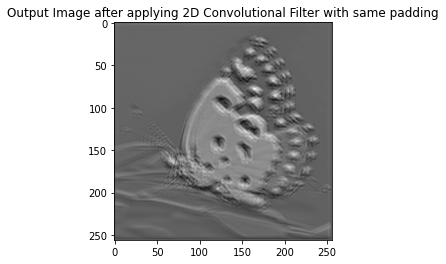

In [ ]:
#Performing Convolution over Image
output = conv2dsame(image,filter)

print("The Shape of Output:  ", output.shape)
print("\nThe Shape of Image: ", image.shape)
print("\nThe Shape of Kernal: ", filter.shape)
plt.imshow(output, cmap='gray')
plt.title("Output Image after applying 2D Convolutional Filter with same padding")

----------------------------------------------------

**3. Use any one of your built “Conv2” function file to  perform the convolution operation given the input matrix and ‘N1’ number of filters.**

In [ ]:
#Defining 2D Convolution

def conv2dsame(input, kernel_size):
  kernel = np.random.randn(kernel_size, kernel_size);
  out = np.zeros((input.shape),  dtype=float)
  p = int((len(kernel) - 1)  / 2)
  input = np.pad(input, (p, p), 'constant')
  H,W = input.shape
  M,N = kernel.shape

  kernel = np.flip(kernel)
  for i in range(H-M+1):
    for j in range(W-N+1):
      out[i,j] =  np.sum( input[i:i+M,j:j+N] * kernel)  #Performing Convolution
  return out

Number of output feature map:  5


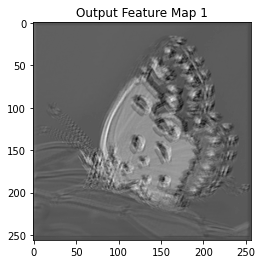

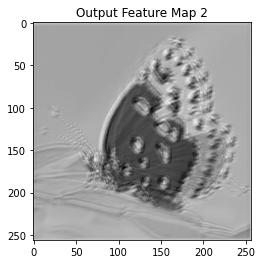

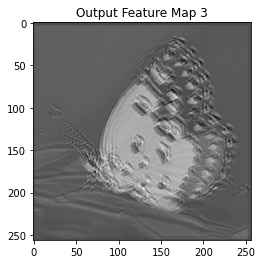

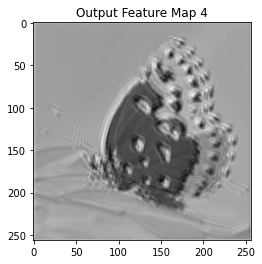

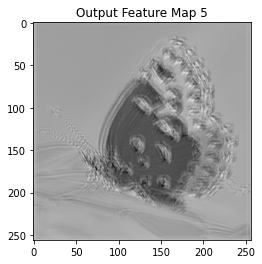

In [ ]:
number_of_filters = 5
multi_output = []
kernal_size = 10 

#Performing Convolutional over volume of filters

for i in range(number_of_filters):
  output = conv2dsame(image, kernal_size) #Conv
  multi_output.append(output)
print("Number of output feature map: ", len(multi_output))

no = 1
for i in multi_output:
  plt.figure()
  plt.imshow(i, cmap='gray')
  plt.title(f"Output Feature Map {no}")
  no+=1

-------------------------------------


**4. Use any one of your built “Conv2” function file to  perform the convolution operation given the input matrix and ‘N1’ number of filters, followed by the convolution operation with ‘N2’ number of filters, where N2>N1.**

No of output feature maps in last layer N1:  5
No of output feature maps in current layer N2:  12


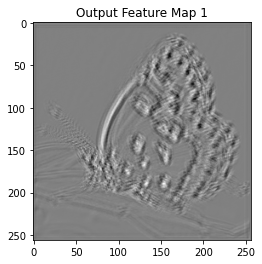

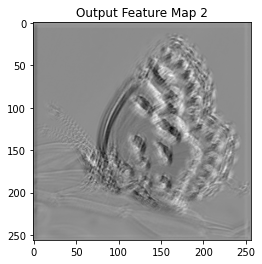

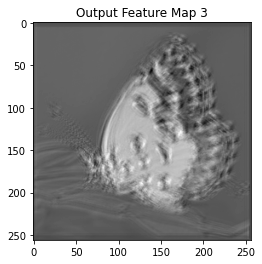

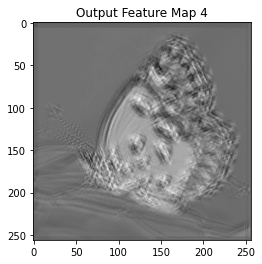

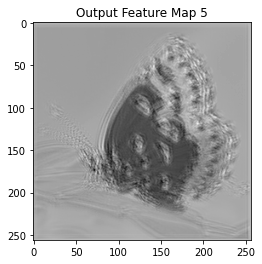

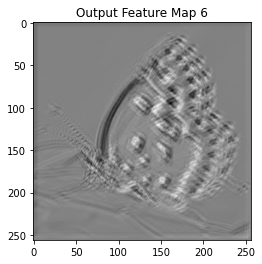

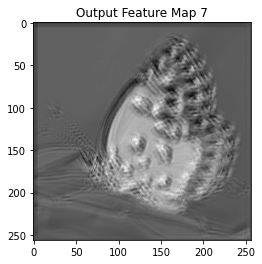

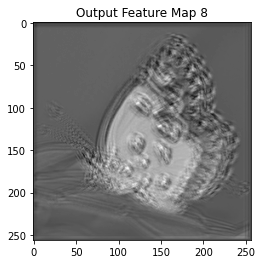

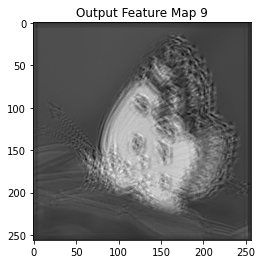

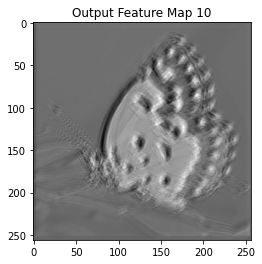

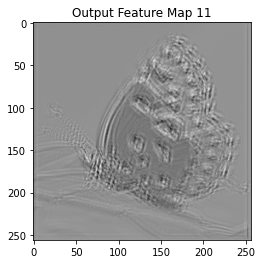

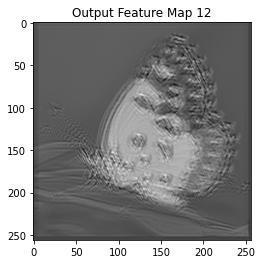

In [ ]:
print("No of output feature maps in last layer N1: ", len(multi_output))

number_of_filters = 12 #Number of Filters in 2nd Convolutional Layer
print("No of output feature maps in current layer N2: ", number_of_filters)

multi_output_2 = [] #Output of Second Convolutional Layer

kernal_size = 8

#Performing Convolutional over volume of filters

for i in range(number_of_filters):
  temp_output=[]
  for j in multi_output:
    temp_output.append(conv2dsame(j,kernal_size))
  
  out = np.array(temp_output)
  out = out.sum(axis=0)
  multi_output_2.append(out)

#Plotting the Feature Maps
no = 1
for i in multi_output_2:
  plt.figure()
  plt.title(f"Output Feature Map {no}")
  plt.imshow(i, cmap='gray')
  no+=1

**Number of learnable parameters =  Number of filters in previous layer X Number of filters in Current Convolutional Layer X Width of the filter in Current Convolutional Layer X Height of the filter in Current Convolutional Layer**

* Number of Filters in Input Image = 1




* Number of Filters in First Convolutional Layer = 5
* Size of Filter in First Convolutional Layer = 10 X 10




* Number of Filters in Second Convolutional Layer = 12
* Size of Filter in Second Convolutional Layer = 8 X 8



**Number of learnable parameters in first Convolutional Layer = 1 X 5 X 10 X 10 = 500 parameters**

**Number of learnable parameters in second Convolutional Layer = 5 X 12 X 8 X 8 = 3840 parameters**

**Total = 500 + 3840 = 4340 parameters**

-------------------------------------------------------

**5. Compute the number of learnable parameters for Q.No.4.  Validate your  computation with the number of learnable parameters given by Keras-Tensorflow framework.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

In [ ]:
# Validating using keras tensorflow framework
model = tf.keras.models.Sequential([ 
Conv2D(filters=5, kernel_size=(10,10), input_shape = (image.shape[0],image.shape[1],1), use_bias=False),
Conv2D(filters=12, kernel_size=(8,8), use_bias=False)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 247, 247, 5)       500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 12)      3840      
Total params: 4,340
Trainable params: 4,340
Non-trainable params: 0
_________________________________________________________________


We see that the number of parameters in Q4 matches with the learnable parameters given by Keras-Tensorflow framework as given in Q5

----------------------------------------